## NetFlix Major Project VOIS

In [2]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Upload the dataset
data = pd.read_csv('Netflix Dataset.csv')

In [5]:
# Copy the dataset
df = data.copy()
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# Shape of the dataset
df.shape

(7789, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [ ]:
# Number of Unique Values in columns
for unq in df.columns:
    print(f'{unq} : {df[unq].nunique()}')
    
    

Show_Id : 7787
Category : 2
Title : 7787
Director : 4050
Cast : 6831
Country : 681
Release_Date : 1565
Rating : 14
Duration : 216
Type : 492
Description : 7769


In [ ]:
# Count how many Movies vs TV Shows are in the dataset.
df['Category'].value_counts()

Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

In [11]:
df['Title'].value_counts()
    

Title
Backfire                 2
The Lost Okoroshi        2
Z Nation                 1
(Un)Well                 1
Zion                     1
                        ..
Zozo                     1
Zubaan                   1
Zulu Man in Japan        1
Zumbo's Just Desserts    1
1920                     1
Name: count, Length: 7787, dtype: int64

In [ ]:
# Find the 10 most common genres/types.
df['Type'].value_counts().head(10)

Type
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: count, dtype: int64

In [ ]:
# Top 10 Director with movie Title and Country
df.groupby(['Title','Country'])['Director'].value_counts().head(10)

Title                          Country        Director                   
#Alive                         South Korea    Cho Il                         1
#AnneFrank - Parallel Stories  Italy          Sabina Fedeli, Anna Migotto    1
#FriendButMarried              Indonesia      Rako Prijanto                  1
#FriendButMarried 2            Indonesia      Rako Prijanto                  1
#Roxy                          Canada         Michael Kennedy                1
#Rucker50                      United States  Robert McCullough Jr.          1
#Selfie                        Romania        Cristina Jacob                 1
#Selfie 69                     Romania        Cristina Jacob                 1
#cats_the_mewvie               Canada         Michael Margolis               1
#realityhigh                   United States  Fernando Lebrija               1
Name: count, dtype: int64

In [ ]:
# Top 10 Country Produces the Most Netflix Content?
df['Country'].value_counts().head(10)

Country
United States     2556
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: count, dtype: int64

In [28]:
# Count Rating Type Movies
df.groupby(['Category'])['Rating'].value_counts()

Category  Rating  
Movie     TV-MA       1847
          TV-14       1272
          R            663
          TV-PG        505
          PG-13        386
          PG           247
          TV-Y         117
          TV-G         111
          TV-Y7         95
          NR            79
          G             39
          TV-Y7-FV       5
          UR             5
          NC-17          3
TV Show   TV-MA       1018
          TV-14        659
          TV-PG        301
          TV-Y7        176
          TV-Y         163
          TV-G          83
          NR             5
          R              2
          TV-Y7-FV       1
Name: count, dtype: int64

In [29]:
# Fill missing values with "Unknown" for categorical columns
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Unknown")

In [30]:
# For Release_Date, drop missing values
df = df.dropna(subset=['Release_Date'])

In [31]:
# 2. Convert Release_Date into year & month
# -------------------------------
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year and month
df['Release_Year'] = df['Release_Date'].dt.year
df['Release_Month'] = df['Release_Date'].dt.month

In [33]:
# 3. Split Duration into numerical + type (minutes/seasons)
# Create two new columns
df['Duration_Numeric'] = df['Duration'].str.extract('(\d+)').astype(float)
df['Duration_Type'] = df['Duration'].str.extract('([a-zA-Z]+)')

In [34]:
print(df[['Title','Duration','Duration_Numeric','Duration_Type','Release_Year','Release_Month']].head())


   Title   Duration  Duration_Numeric Duration_Type  Release_Year  \
0     3%  4 Seasons               4.0       Seasons        2020.0   
1  07:19     93 min              93.0           min        2016.0   
2  23:59     78 min              78.0           min        2018.0   
3      9     80 min              80.0           min        2017.0   
4     21    123 min             123.0           min        2020.0   

   Release_Month  
0            8.0  
1           12.0  
2           12.0  
3           11.0  
4            1.0  


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7779 entries, 0 to 7788
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Show_Id           7779 non-null   object        
 1   Category          7779 non-null   object        
 2   Title             7779 non-null   object        
 3   Director          7779 non-null   object        
 4   Cast              7779 non-null   object        
 5   Country           7779 non-null   object        
 6   Release_Date      7691 non-null   datetime64[ns]
 7   Rating            7779 non-null   object        
 8   Duration          7779 non-null   object        
 9   Type              7779 non-null   object        
 10  Description       7779 non-null   object        
 11  Release_Year      7691 non-null   float64       
 12  Release_Month     7691 non-null   float64       
 13  Duration_Numeric  7779 non-null   float64       
 14  Duration_Type     7779 non-nu

In [36]:
df.tail()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year,Release_Month,Duration_Numeric,Duration_Type
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0,10.0,99.0,min
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,3.0,111.0,min
7786,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0,9.0,44.0,min
7787,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020.0,10.0,1.0,Season
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020.0,3.0,90.0,min


### Visualization 

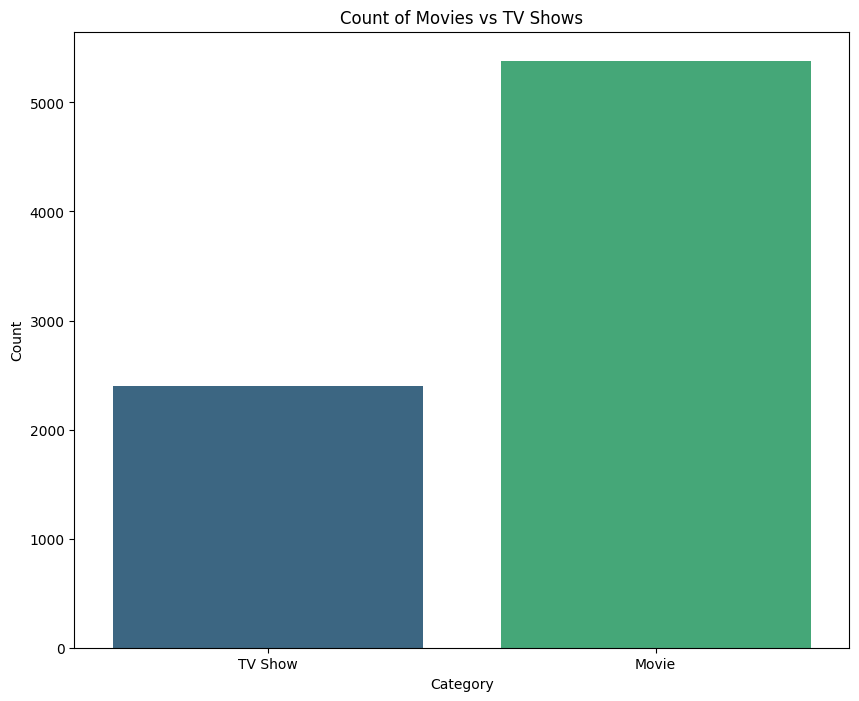

In [ ]:
# Bar chart of Category (Movies and TV Shows)
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Category', palette='viridis')
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

`Insights`

The movies are more than Tv show.

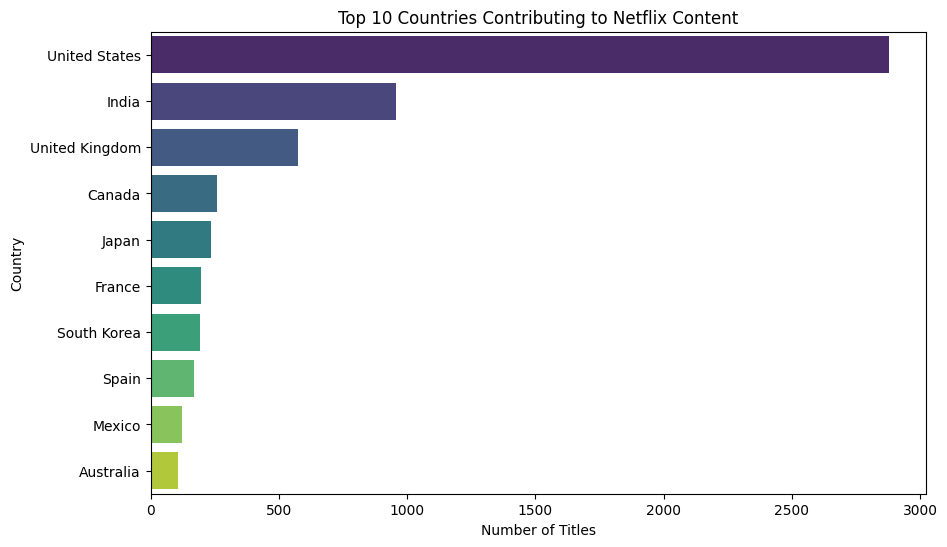

In [69]:
# Bar chart of Category (Movies and TV Shows)
df['Main_Country'] = df['Country'].str.split(',').str[0]

# Exclude unknown countries
df_countries = df[df['Main_Country'] != "Unknown"]

# Top 10 countries
top_countries = df_countries['Main_Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries Contributing to Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


`Insights`

3. Country-wise Contributions

United States is the largest contributor to Netflix’s content, followed by India, United Kingdom, Canada, and Japan.

Contributions from India and South Korea have grown significantly in recent years, showing Netflix’s strategy to expand in Asian markets.

The top 10 countries collectively make up a large portion of Netflix’s library, indicating regional diversity.

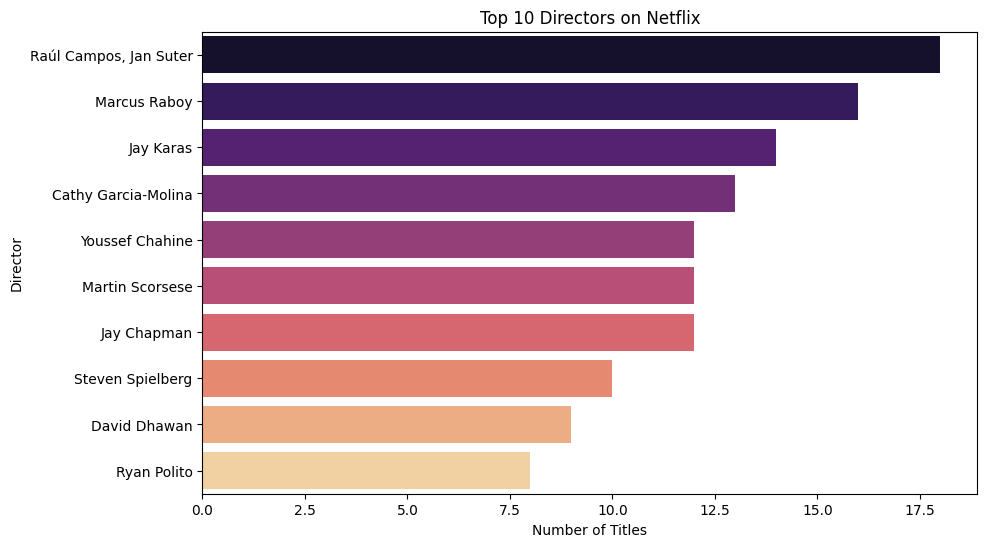

In [ ]:
# 2. Bar Chart → Top 10 Directors

top_directors = df[df['Director']!="Unknown"]['Director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="magma")
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

`Insights` 

The top 10 director whose movies are most famous in world wide.

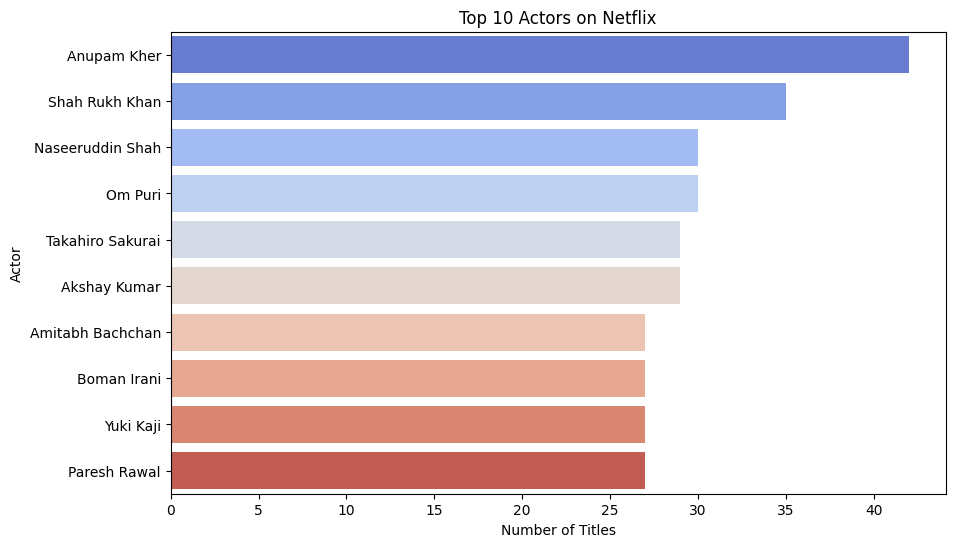

In [70]:
# 3. Bar Chart → Top 10 Actors cast in movies
from collections import Counter

cast_list = df[df['Cast']!="Unknown"]['Cast'].str.split(',').sum()
actor_count = Counter([actor.strip() for actor in cast_list])

top_actors = pd.Series(dict(actor_count)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="coolwarm")
plt.title("Top 10 Actors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()

`Insights`

Most cast actor is Anupam Kher and second is Shah Rukh Khan in most Movies.

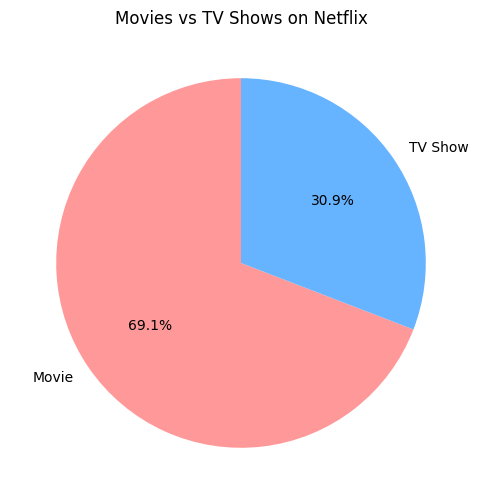

In [ ]:
# 4. Pie Chart → Movies vs TV Shows

category_counts = df['Category'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
        startangle=90, colors=["#ff9999","#66b3ff"])
plt.title("Movies vs TV Shows on Netflix")
plt.show()

`Insights` 

The Movie is 69.1% and Tv show is 30.9%.

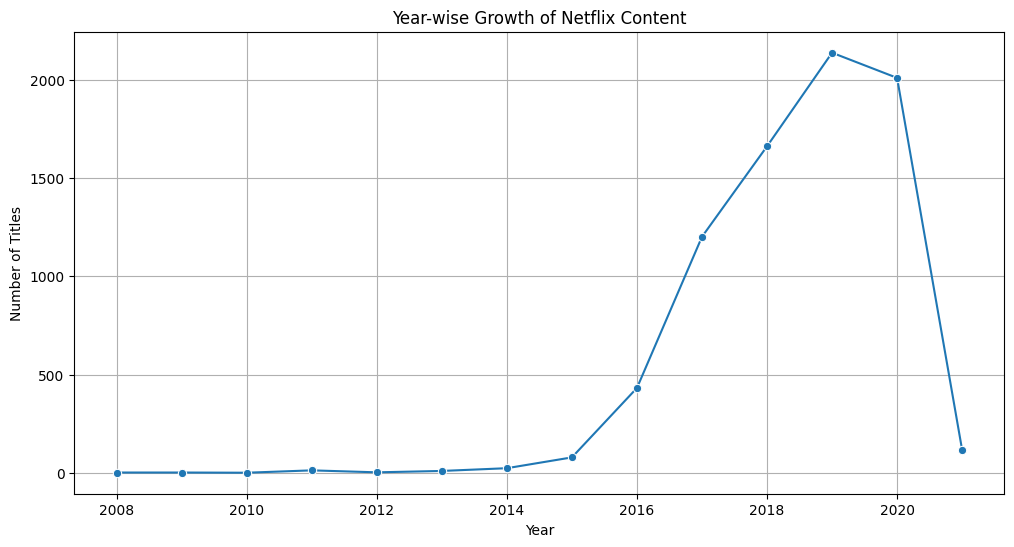

In [ ]:
# 5. Line Chart → Year-wise Growth

yearly_trend = df['Release_Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o")
plt.title("Year-wise Growth of Netflix Content")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

`Insights` 

The netflix growth is starting from 2015 to 2019  and then suddenly decrease.

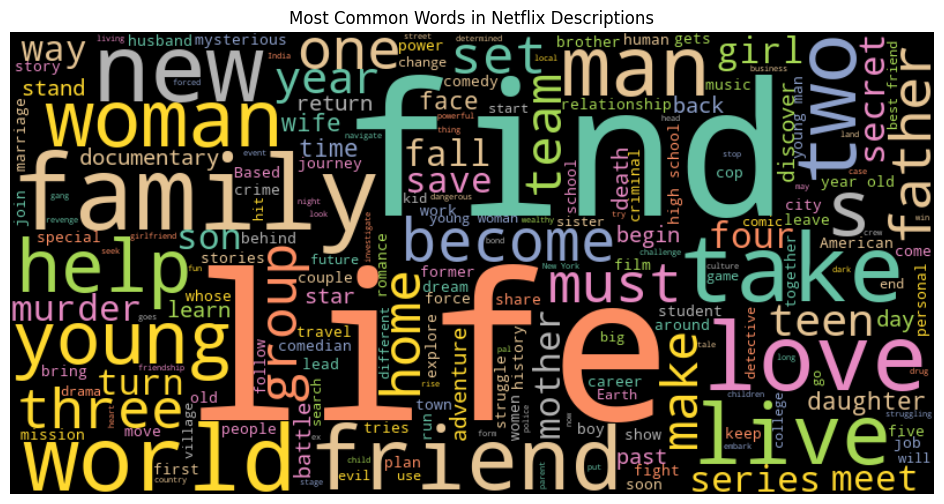

In [63]:
# 6. WordCloud → Description → Most Common Words in Descriptions

from wordcloud import WordCloud

text = " ".join(df['Description'].astype(str).values)

wordcloud = WordCloud(width=800, height=400, background_color="black",
                      colormap="Set2").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Netflix Descriptions")
plt.show()

`Insights`

The word 'life' is most repeated/common word in Netflix Description and second word is 'find' and so on.

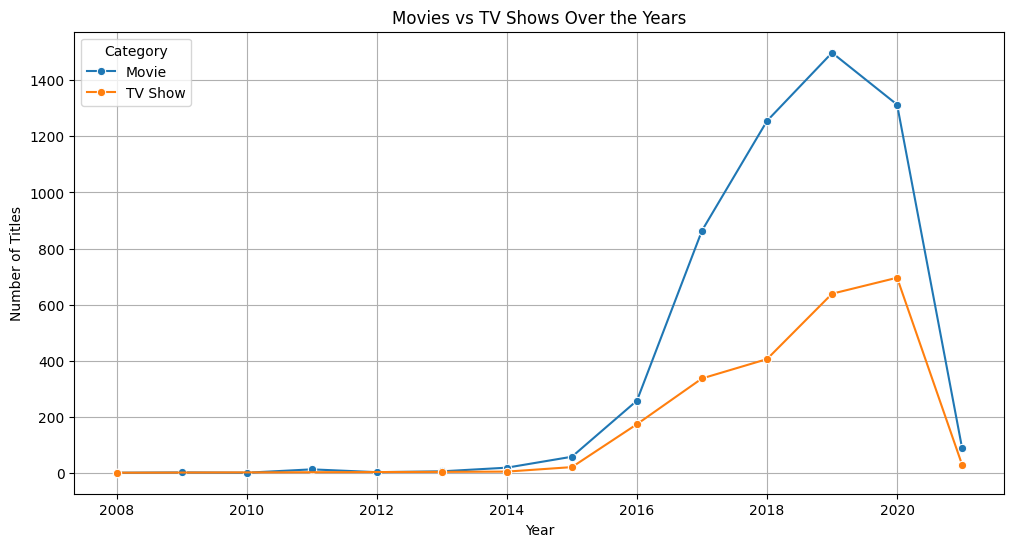

In [65]:
# Count of Movies vs TV Shows per year
movies_tv_trend = df.groupby(['Release_Year','Category']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.lineplot(data=movies_tv_trend, x='Release_Year', y='Count', hue='Category', marker="o")
plt.title("Movies vs TV Shows Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


`Insights`
1. Movies vs TV Shows Over the Years

In the early years, Movies numbere are more than TV Shows on Netflix.

Over time, especially after 2015, there has been a significant increase in TV Shows.

In recent years (around 2018–2020), the gap between Movies and TV Shows has narrowed, indicating that Netflix is now balancing both formats.

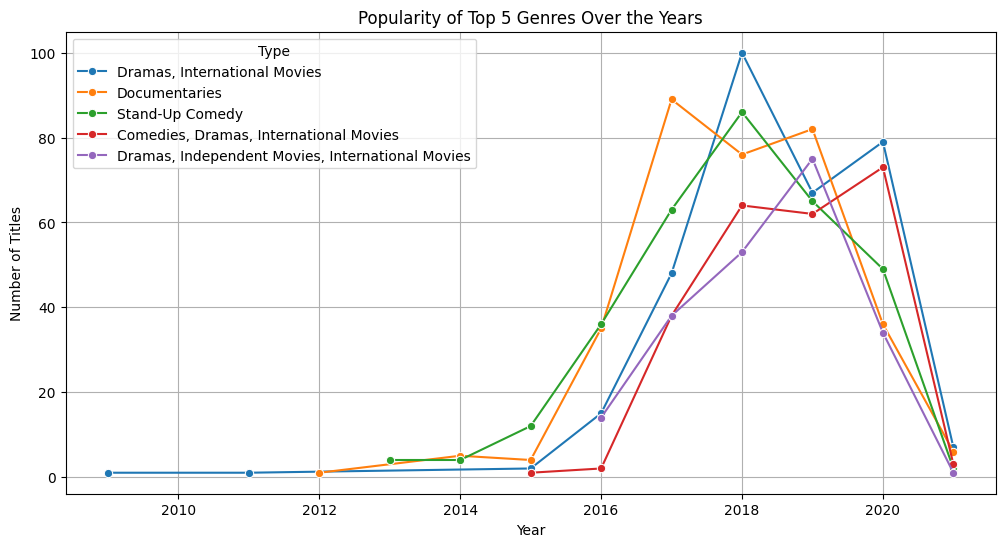

In [66]:
# Top 5 genres overall
top_genres = df['Type'].value_counts().head(5).index

# Filter dataset for only top genres
genre_trend = df[df['Type'].isin(top_genres)].groupby(['Release_Year','Type']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.lineplot(data=genre_trend, x='Release_Year', y='Count', hue='Type', marker="o")
plt.title("Popularity of Top 5 Genres Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


`Insights`

2. Most Common Genres & Their Popularity Over Time

The most popular genres in the dataset are Drama, Comedy, Action, Documentary, and International movies.

Drama and Comedy have consistently been high contributors to Netflix’s catalog.

After 2016, there is noticeable growth in Documentaries and International shows, reflecting Netflix’s focus on catering to a global audience.

In [71]:
# Movies vs TV Shows duration
duration_stats = df.groupby('Category')['Duration_Numeric'].mean()
print(duration_stats)


Category
Movie      99.306563
TV Show     1.760833
Name: Duration_Numeric, dtype: float64


In [48]:
top_actors

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Takahiro Sakurai    29
Akshay Kumar        29
Amitabh Bachchan    27
Boman Irani         27
Yuki Kaji           27
Paresh Rawal        27
dtype: int64

In [17]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')